In [47]:
"""
Plots a birfurcation diagram of the logistic map

Parameters
----------
data : numpy array
    Bifurcation data.
n_mu : int
    Number of distinct mu values tested.
resolution : int
    Number of bins. Lower means less clear graph (400 recommended)
mu_min : float
    Minimum mu value tested (should be 2.4)
mu_max : float
    Maximum mu value tested (should be 4.0)
x_min : int
    Minimum value of data point (default 0).
x_max : int
    Maximum value of data point (default 1).

Output
------
Returns nothing. Should display a graph.

NOTES
n_data -> Number of "data" iterations you have.
data -> A 2D numpy array of shape (n_mu, n_data). Each row represents a certain mu value. Each column represents the ith data iteration.
For example data[5][100] means the point found at the 100th data iteration for the 5th mu value you analyzed.
"""

import numpy as np
import matplotlib.pyplot as plt

def create_graph(data, n_mu, resolution = 400, mu_min = 2.4, mu_max = 4.0, x_min = 0, x_max = 1):

  # Check for correct data format
  if (len(data.shape) != 2) or (data.shape[0] != n_mu):
    print("data may be in wrong shape!")
    return

  #Bin the data
  binned_grid = np.zeros((n_mu, resolution))
  for mu_ctr in range(n_mu):
    binned, _ = np.histogram(data[mu_ctr], bins = resolution, range = (0, 1))
    binned = binned.astype('float64')
    binned /= np.max(binned)
    binned_grid[mu_ctr] = binned
  binned_grid = np.transpose(binned_grid) #Had to transpose for correct orientation.

  #Create graph
  plt.figure(figsize=(10, 8))
  plt.imshow(binned_grid, origin = "lower", extent=[mu_min, mu_max, x_min, x_max], cmap='binary')
  plt.title("Logistic Map Bifurcation Diagram")
  plt.xlabel("µ")
  plt.ylabel("x")
  plt.tight_layout()
  plt.show()

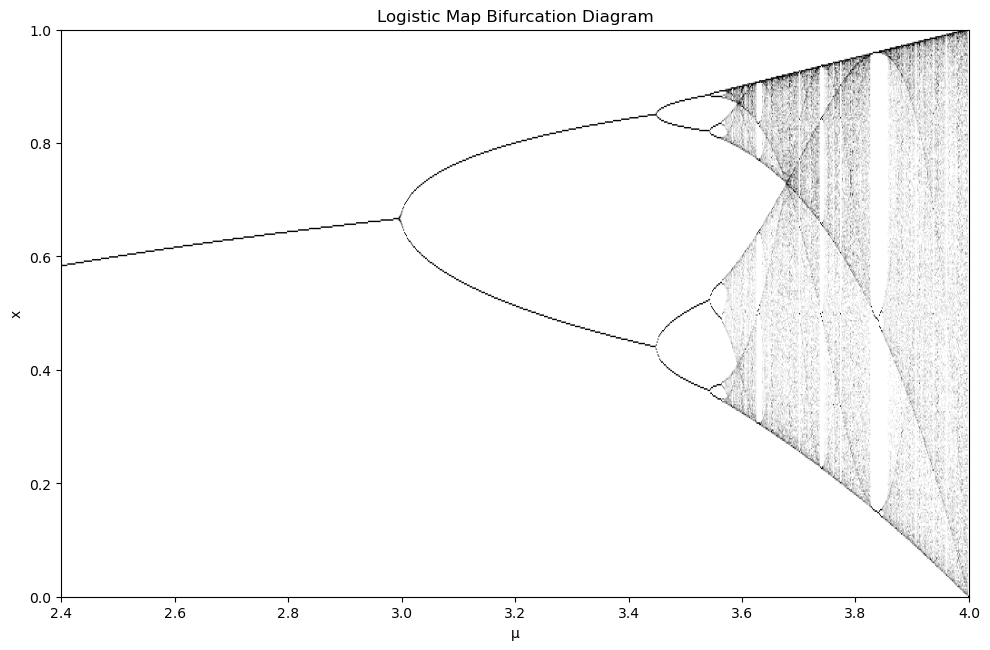

In [48]:
def bifurcate(n_mu, trans_iters=400, n_data=400, mu_min=2.4, mu_max=4.0):
    """ 
    Generates logistic map data for a bifurcation diagram.

    Parameters
    ----------
    n_mu : int
        Number of distinct mu values tested.
    trans_iters : int
        Number of transient (steady-state) iterations to discard for each µ.
    n_data : int
        Number of iterations for each µ.
    mu_min : float
        Minimum mu value tested (should be 2.4).
    mu_max : float
        Maximum mu value tested (should be 4.0).

    Output
    ------
    Returns a numpy array (n_mu, n_data).
    """
    x0=0.5

    data = np.zeros((n_mu, n_data))

    for i, mu in enumerate(np.linspace(mu_min, mu_max, n_mu)):
        x = x0
        for _ in range(trans_iters): # transient iterations
            x = mu * x * (1-x)
        for j in range(n_data): # data iterations
            x = mu * x * (1-x)
            data[i, j] = x
    
    return data


# create_graph(bifurcate(1000), n_mu=1000)
bifurcate(1000)
# plt.plot(bifurcate(1000))
create_graph(bifurcate(1000), n_mu=1000)